In [ ]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [ ]:
from google.colab import auth
import gspread
import pandas as pd
from google.auth import default

# Authenticate the Google account
auth.authenticate_user()

# Authorize access
creds, _ = default()
gc = gspread.authorize(creds)

# Use the link you provided to open the Google Sheet
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1BEV3Lwpa9WR-3-_vc5yWeh8c_yGnmcAm_GAYFxnB3u8/edit?gid=1083552686#gid=1083552686'

# Open the spreadsheet
spreadsheet = gc.open_by_url(spreadsheet_url)

# Select the first worksheet
worksheet = spreadsheet.sheet1

# Get all the data and convert it to a pandas DataFrame
data = worksheet.get_all_records()
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df.head()

Keyword  ashley furniture  furniture stores near me  dining room sets  \
0  21-Jan         4090000.0                 1830000.0          301000.0   
1  21-Feb         3350000.0                 1500000.0          246000.0   
2  21-Mar         4090000.0                 1830000.0          301000.0   
3  21-Apr         3350000.0                 1500000.0          246000.0   
4  21-May         3350000.0                 1500000.0          246000.0   

   king bed frame  bedroom sets  ashley furniture near me  ashley homestore  \
0        165000.0      368000.0                  165000.0          246000.0   
1        135000.0      301000.0                  135000.0          246000.0   
2        165000.0      368000.0                  201000.0          246000.0   
3        135000.0      301000.0                  165000.0          201000.0   
4        135000.0      246000.0                  165000.0          246000.0   

   couches for sale  king size bed frame  ...  entryway bench  ashley outlet  \
0          135000.0             135000.0  ...         90500.0        14800.0   
1          110000.0             110000.0  ...         74000.0        12100.0   
2          135000.0             135000.0  ...         74000.0        18100.0   
3          110000.0             110000.0  ...         60500.0        18100.0   
4          110000.0             110000.0  ...         60500.0        18100.0   

   bar stools with backs   couches  bedroom furniture sets  \
0                60500.0  673000.0                 74000.0   
1                49500.0  550000.0                 60500.0   
2                74000.0  673000.0                 74000.0   
3                74000.0  550000.0                 74000.0   
4                74000.0  550000.0                 74000.0   

   small sectional sofa  reclining sectional  beautyrest mattress  \
0               60500.0              90500.0              40500.0   
1               49500.0              74000.0              40500.0   
2               49500.0              74000.0              40500.0   
3               40500.0              60500.0              33100.0   
4               40500.0              49500.0              40500.0   

   reclining loveseat  queen bed frame with headboard  
0             90500.0                         49500.0  
1             74000.0                         40500.0  
2             74000.0                         49500.0  
3             60500.0                         40500.0  
4             60500.0                         33100.0  

[5 rows x 28 columns]

In [ ]:
df.set_index('Keyword', inplace=True)
df_volume=df[0:43]
df_volume.columns

Index(['ashley furniture', 'furniture stores near me', 'dining room sets',
       'king bed frame', 'bedroom sets', 'ashley furniture near me',
       'ashley homestore', 'couches for sale', 'king size bed frame',
       'sectional sofas', 'ashley's furniture', 'leather sofa',
       'ashleys furniture', 'leather sectional', 'ashley furniture outlet',
       'living room sets', 'tv stand with fireplace', 'entryway bench',
       'ashley outlet', 'bar stools with backs', 'couches',
       'bedroom furniture sets', 'small sectional sofa', 'reclining sectional',
       'beautyrest mattress', 'reclining loveseat',
       'queen bed frame with headboard'],
      dtype='object')

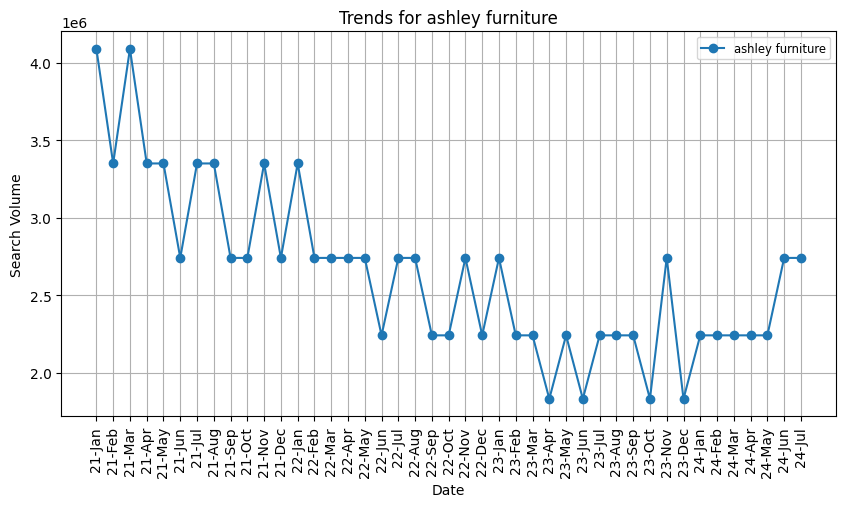

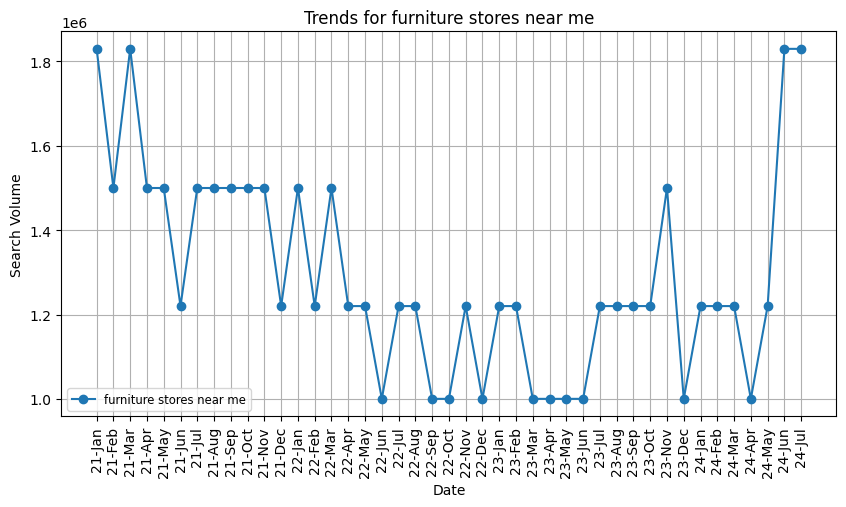

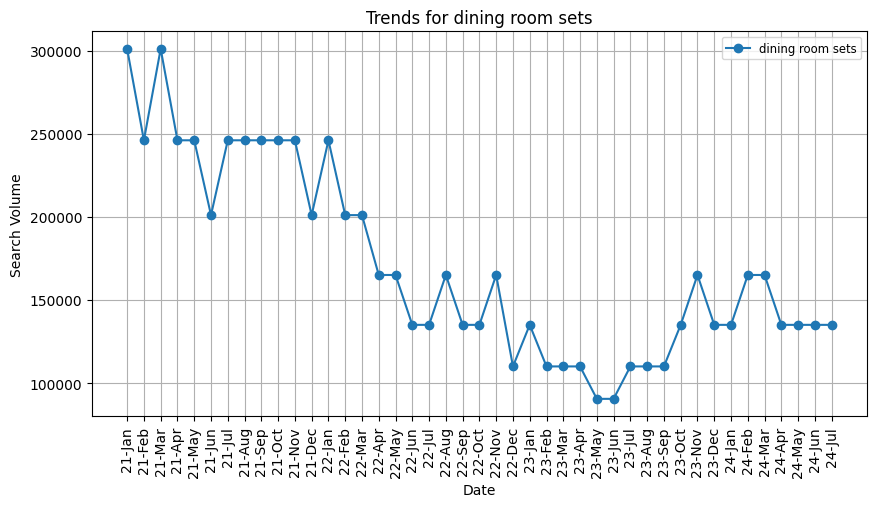

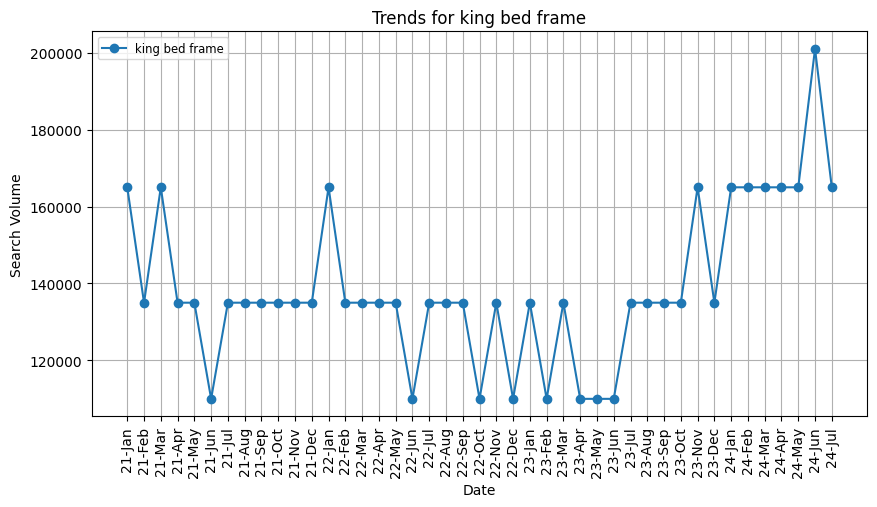

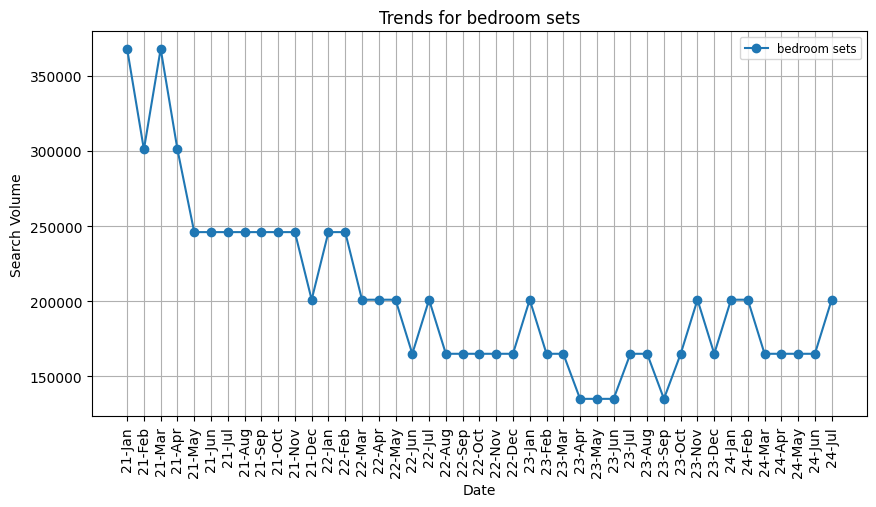

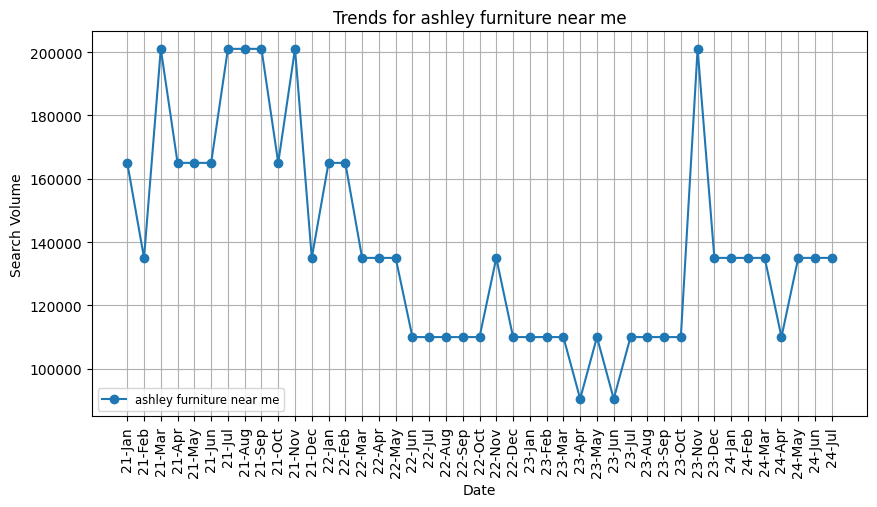

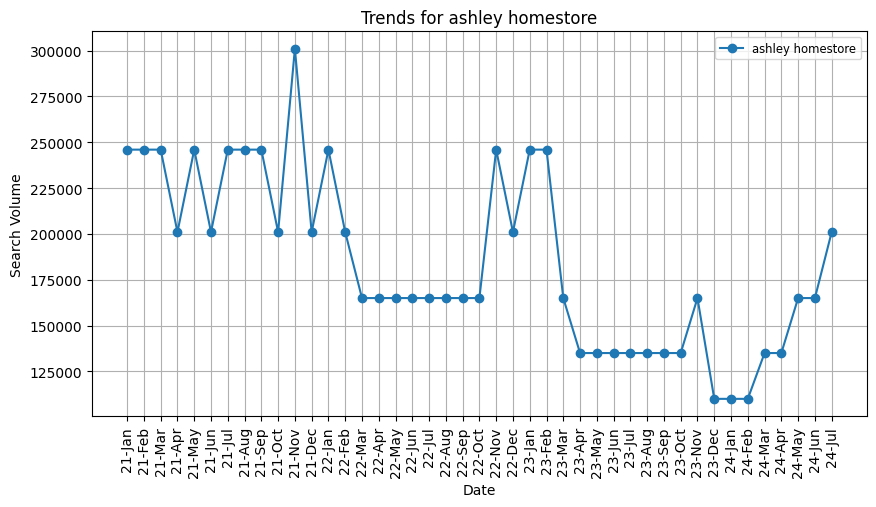

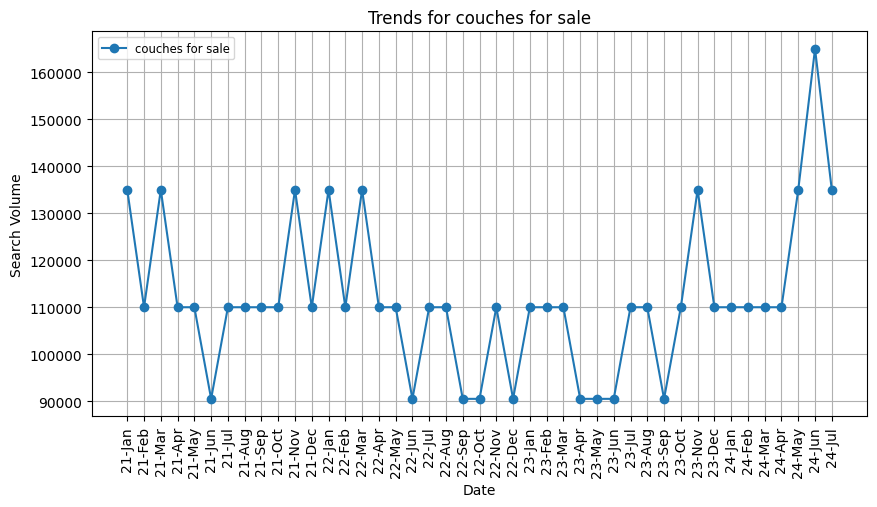

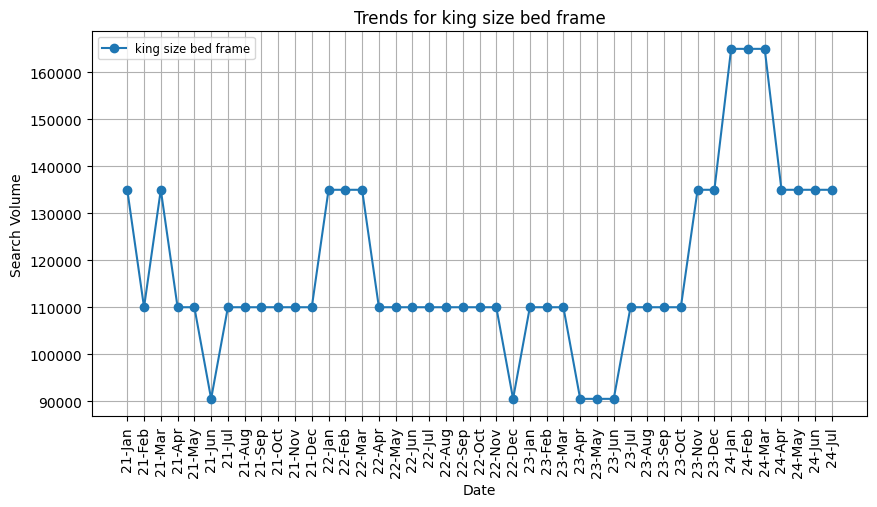

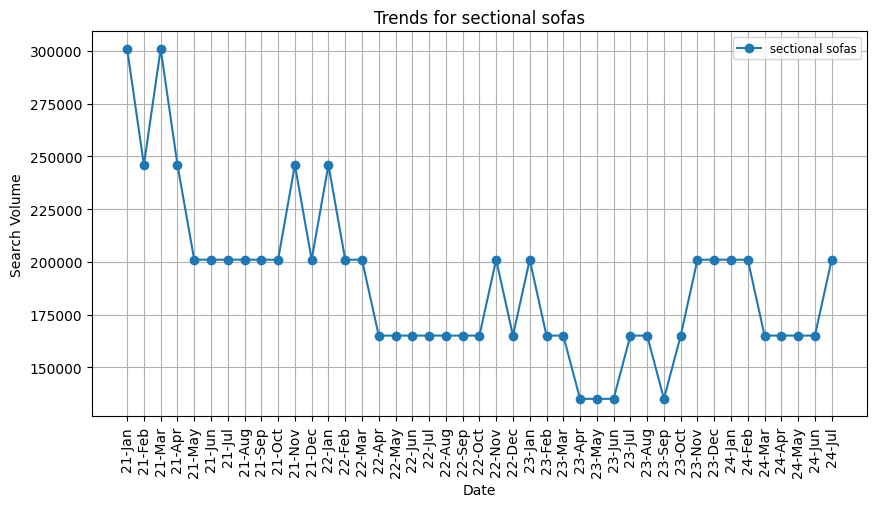

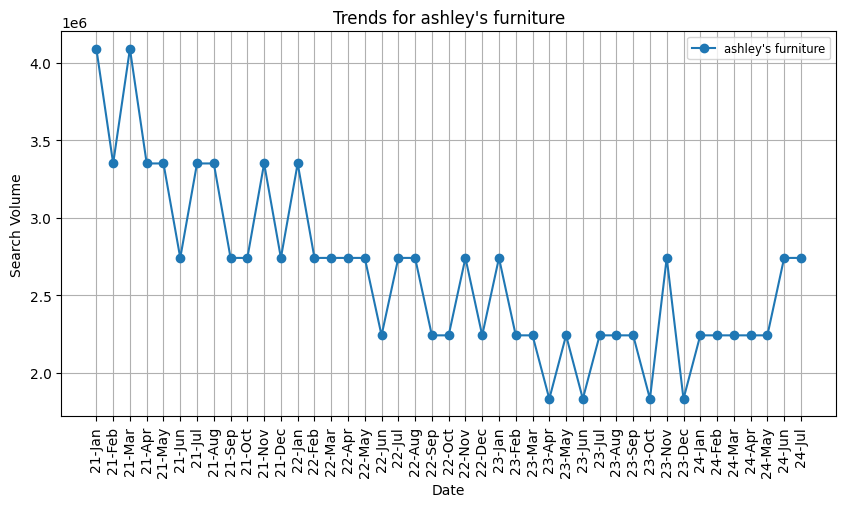

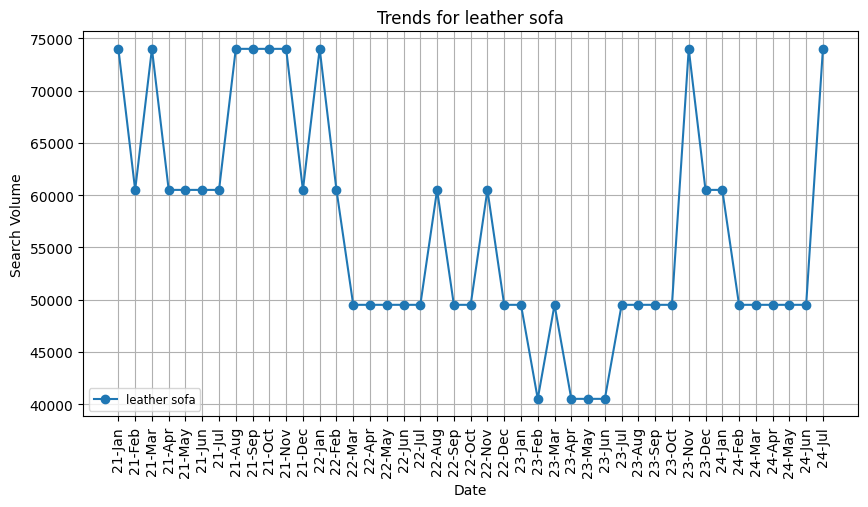

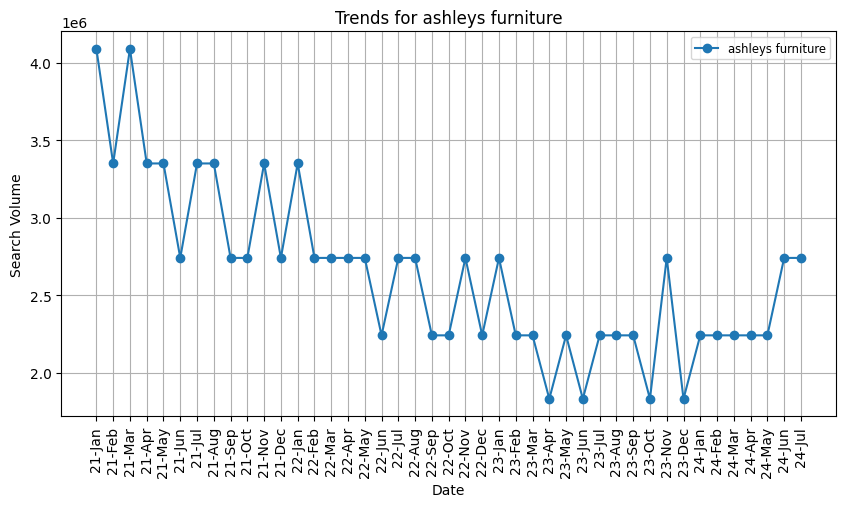

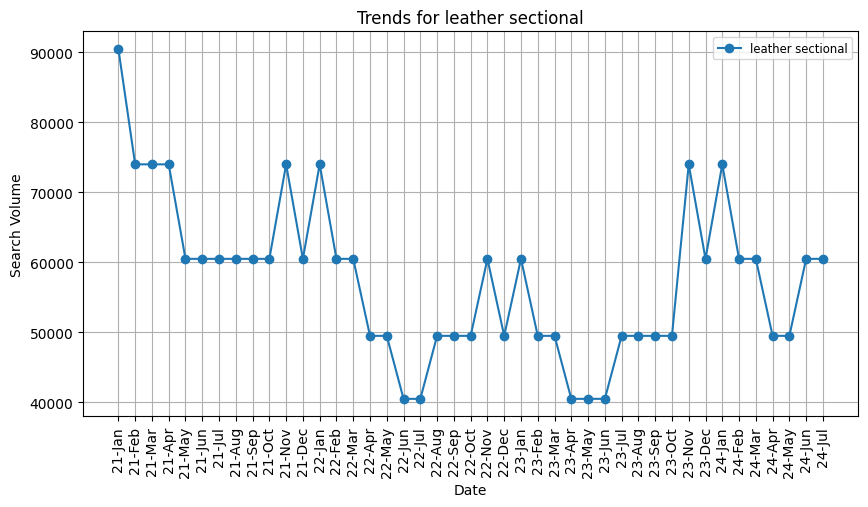

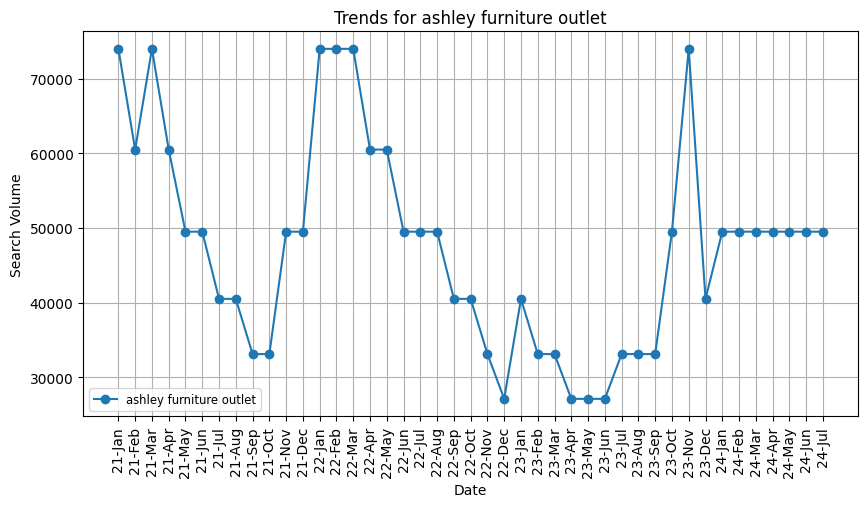

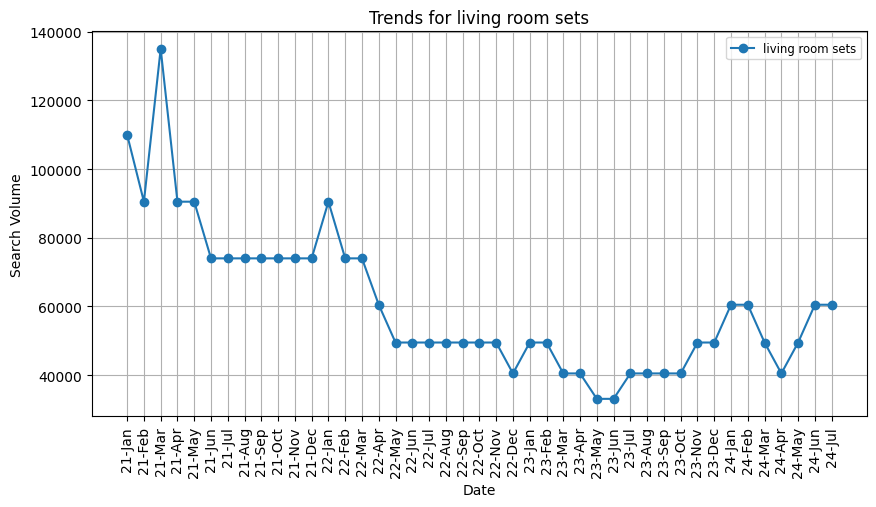

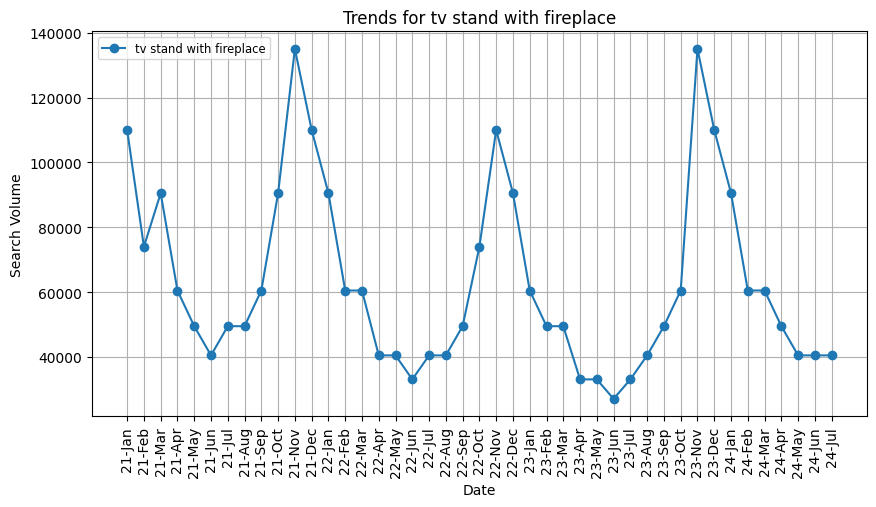

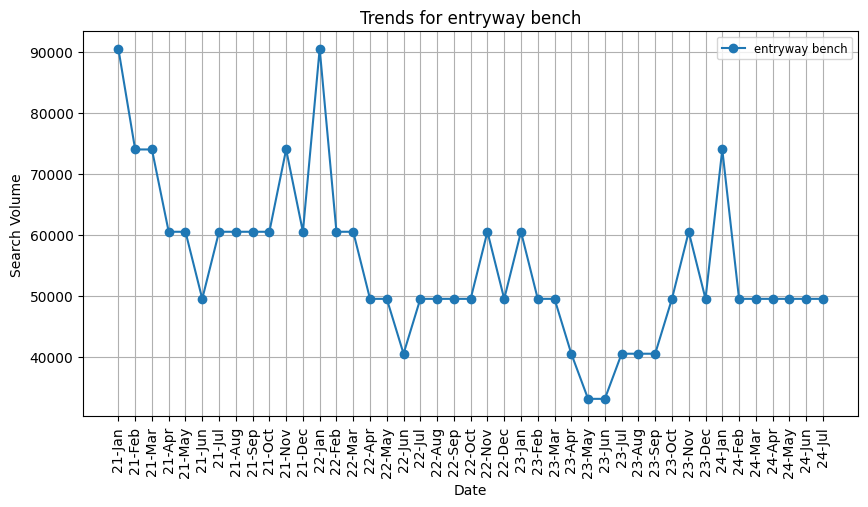

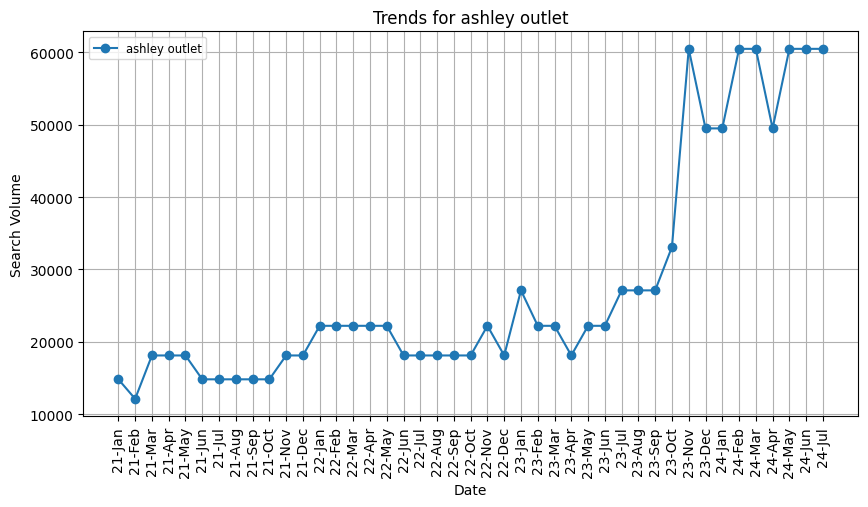

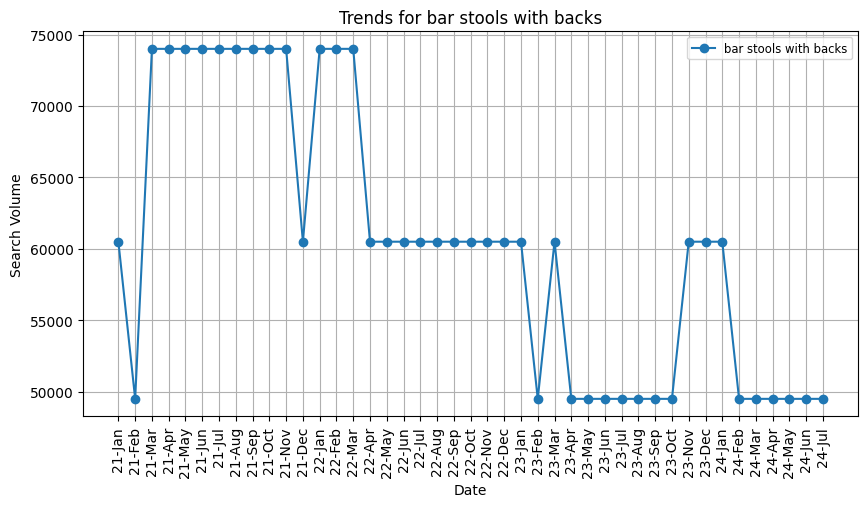

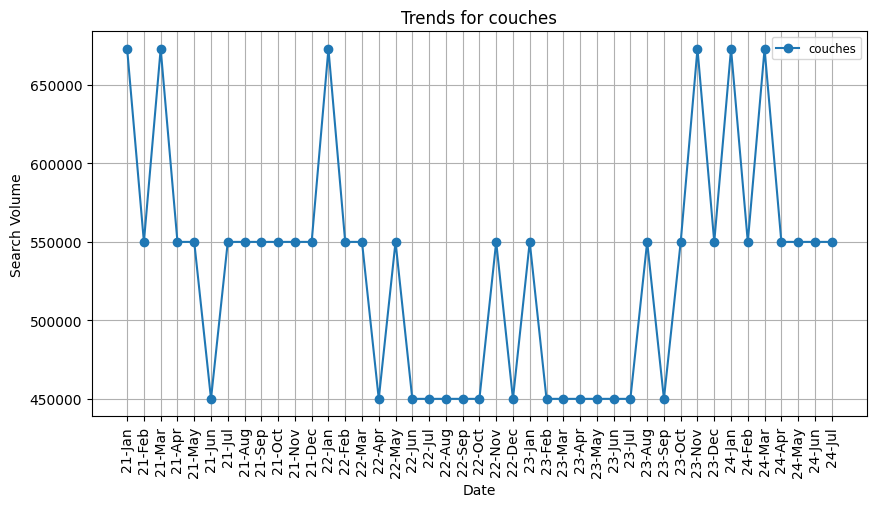

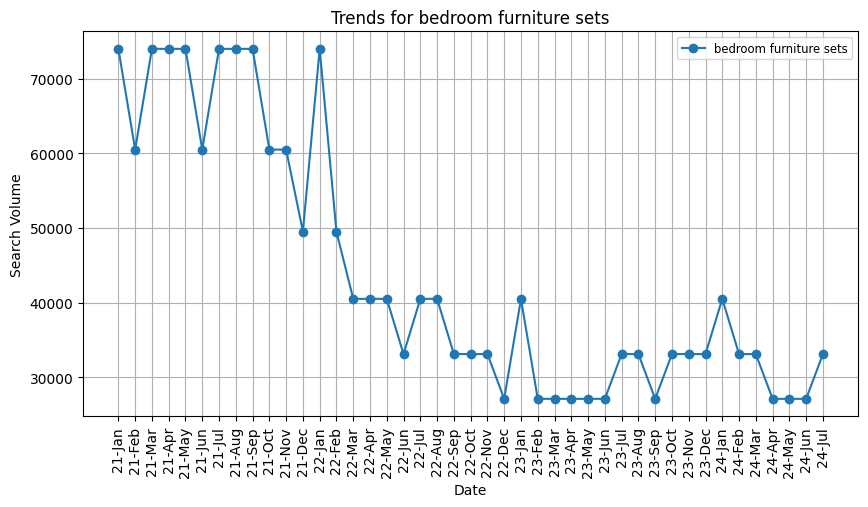

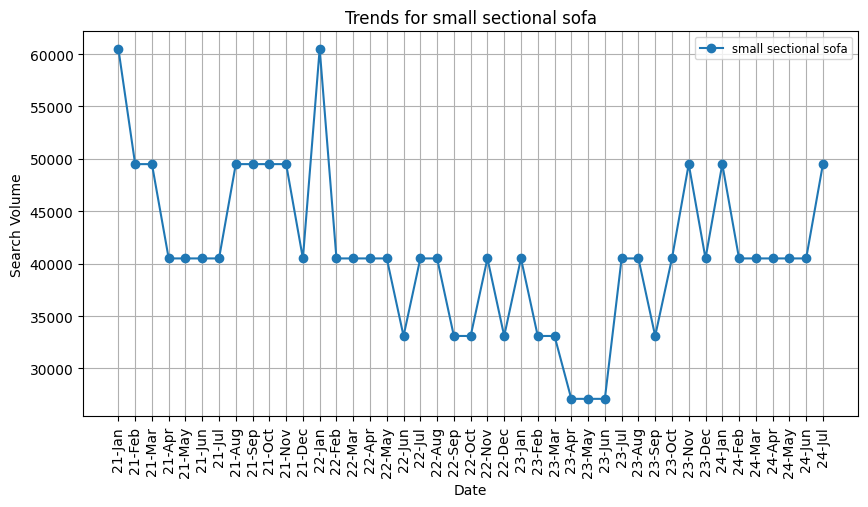

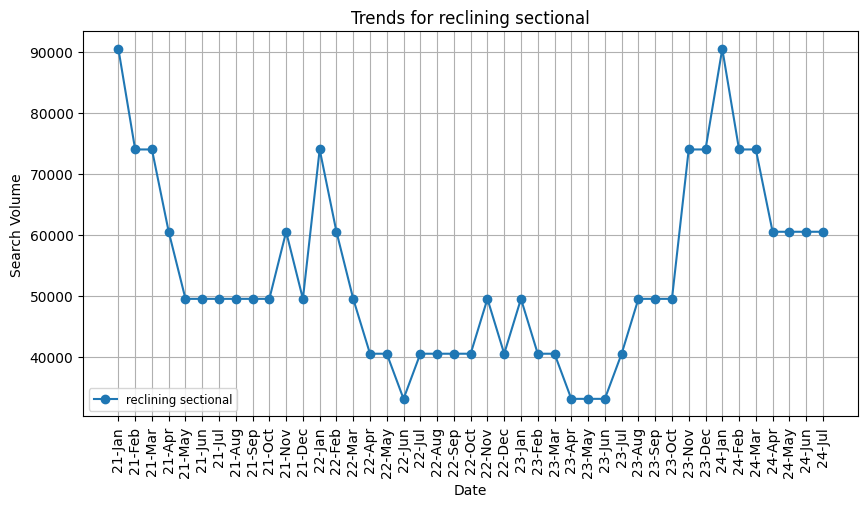

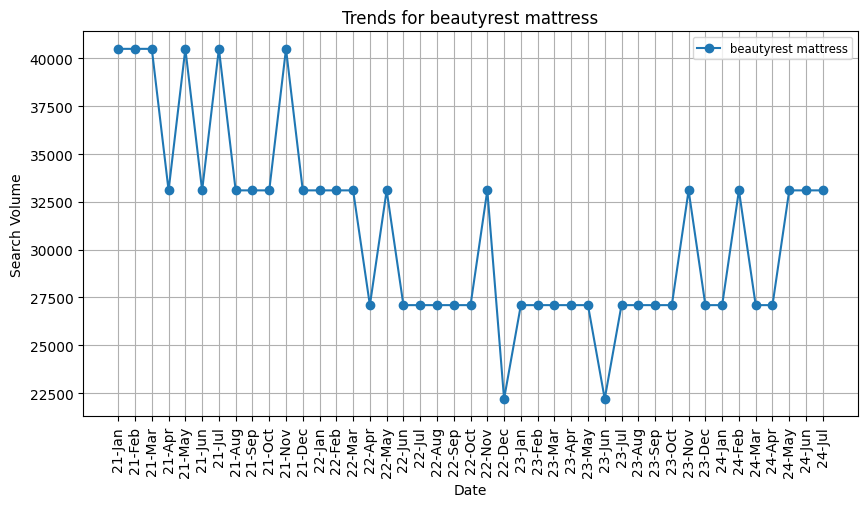

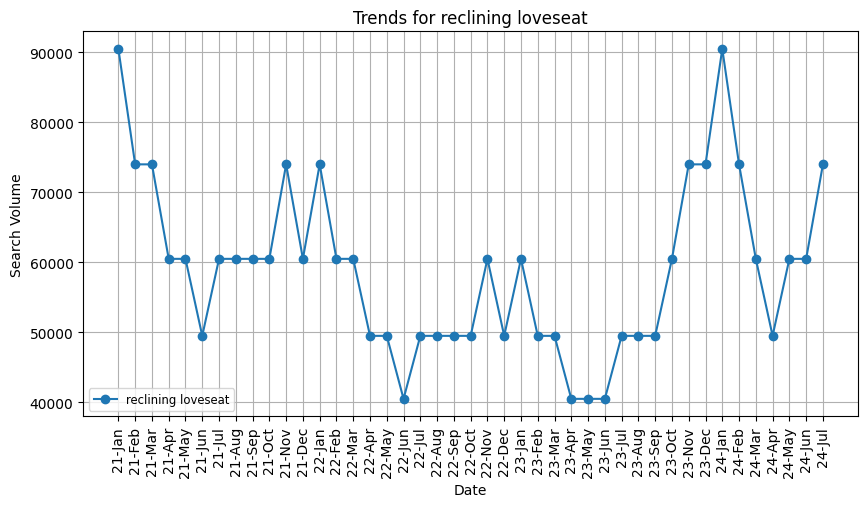

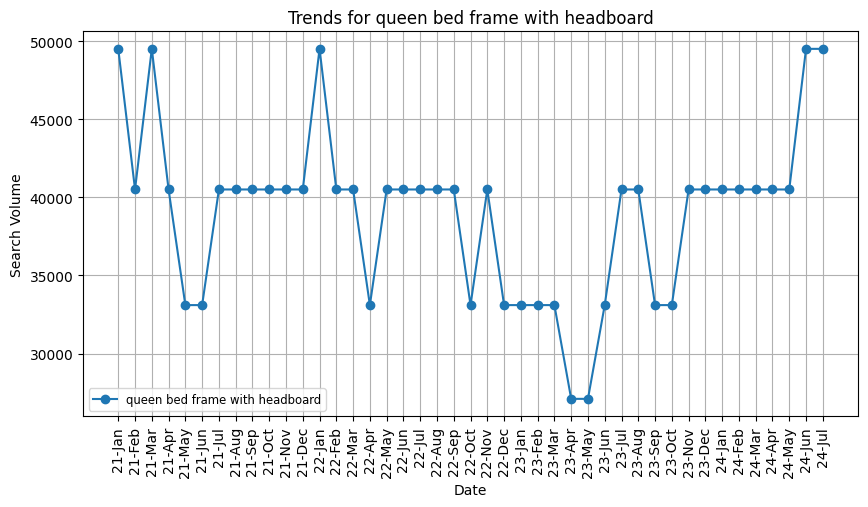

In [ ]:
# for x in df_volume.columns:
#     plt.figure(figsize=(10, 5))
#     plt.plot(df_volume.index, df_volume[x], label=x, marker='o')

#     plt.xlabel('Date')
#     plt.ylabel('Search Volume')
#     plt.title(f'Trends for {x}')
#     plt.legend(fontsize='small')
#     plt.grid(True)
#     plt.xticks(rotation='vertical')

#     plt.show()

Text(220.72222222222223, 0.5, 'Date')

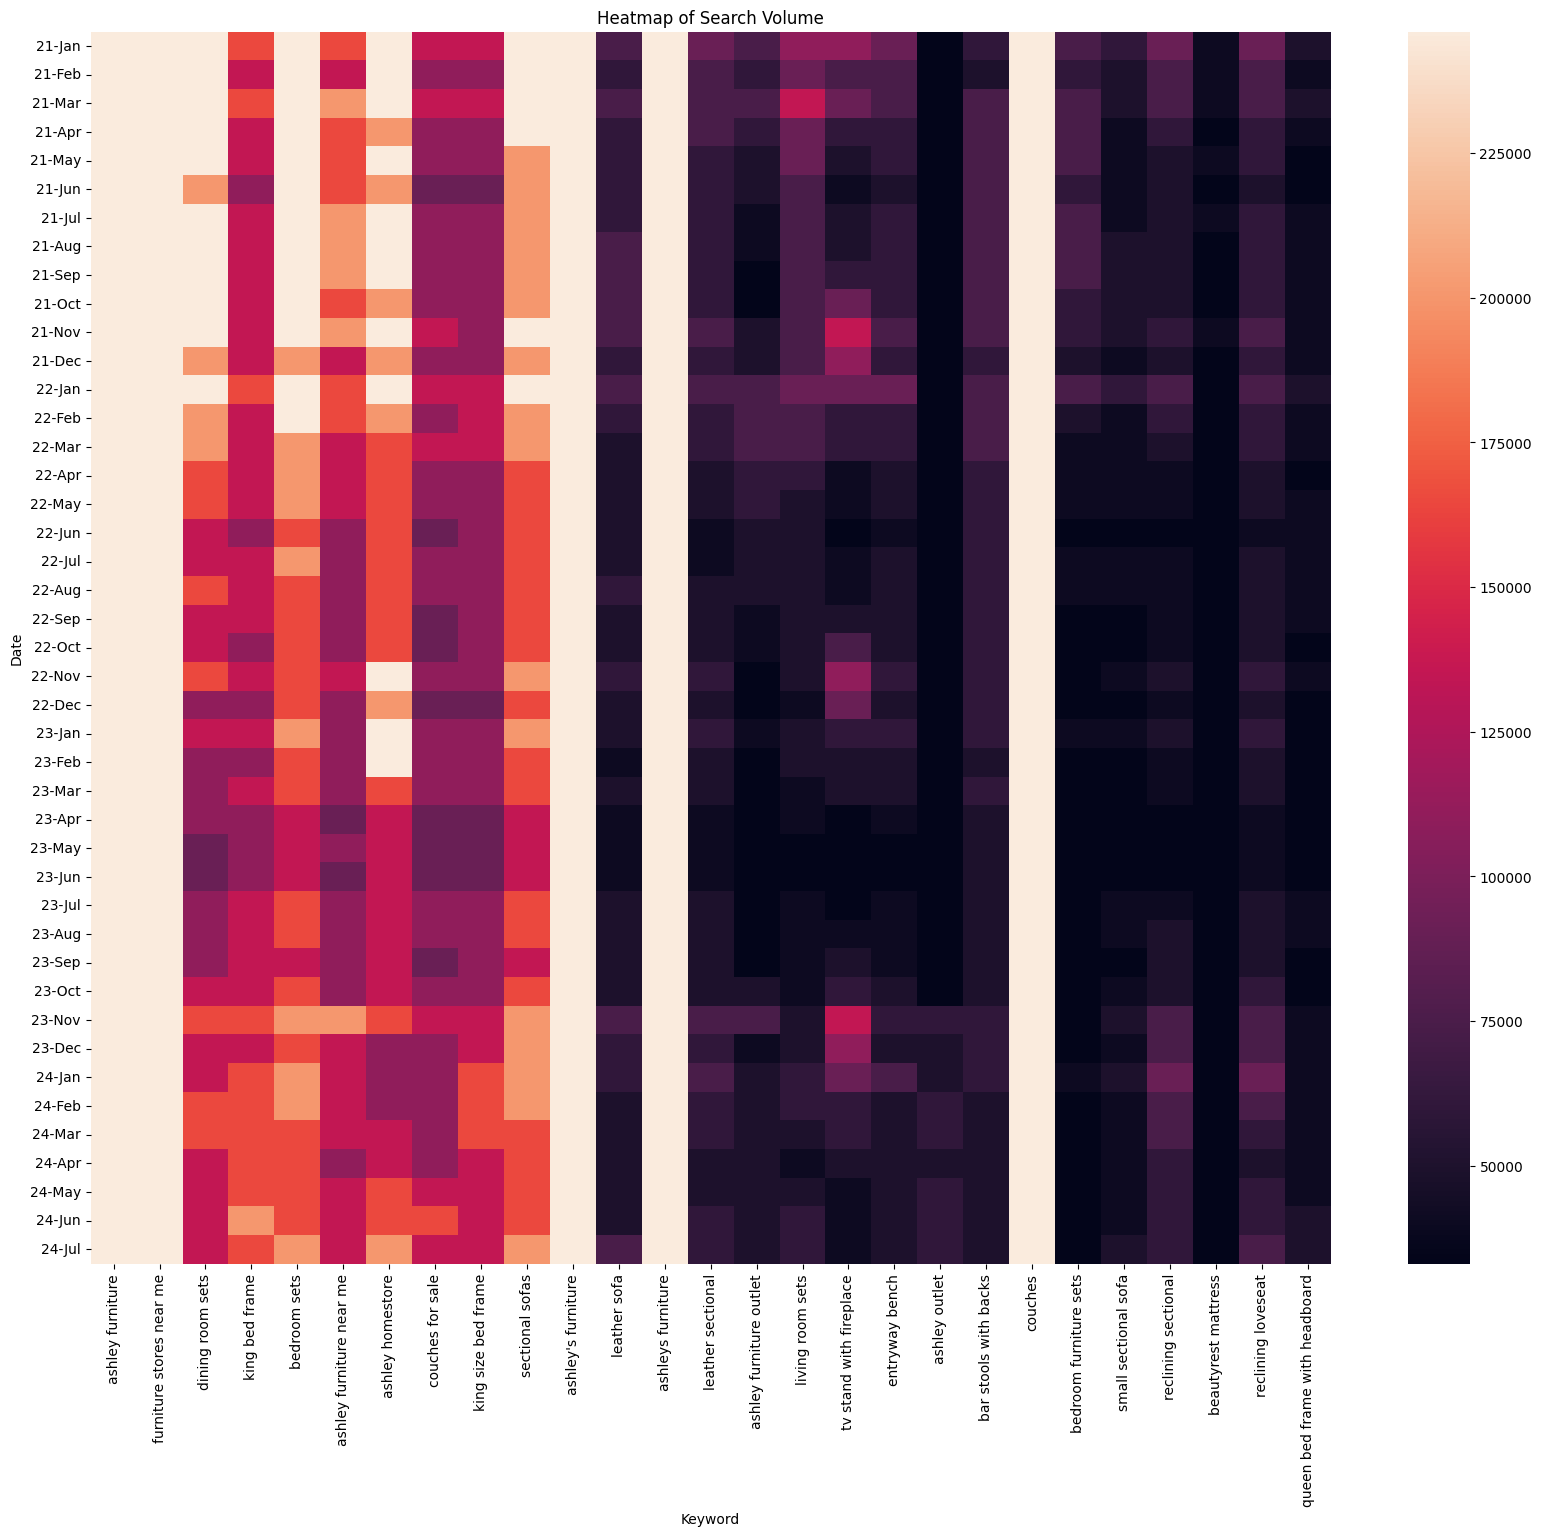

In [ ]:
df_temp = df_volume.replace('', 0)
temp_df = df_temp.astype(int)
all_values = temp_df.values.flatten()
percentile_90 = pd.Series(all_values).quantile(0.80)
percentile_10 = pd.Series(all_values).quantile(0.10)

plt.figure(figsize=(20, 16))
sns.heatmap(temp_df, vmax = percentile_90, vmin = percentile_10)
plt.title('Heatmap of Search Volume')
plt.xlabel('Keyword')
plt.ylabel('Date')


In [ ]:
non_time_series = df[-8:]
non_time_series.T.corr()

Keyword            Search Volume       CPC   Traffic  Traffic (%)  \
Keyword                                                             
Search Volume           1.000000 -0.041779  0.980572     0.980574   
CPC                    -0.041779  1.000000 -0.117029    -0.116940   
Traffic                 0.980572 -0.117029  1.000000     1.000000   
Traffic (%)             0.980574 -0.116940  1.000000     1.000000   
Traffic Cost            0.988650 -0.060108  0.997164     0.997172   
Traffic Cost (%)        0.988653 -0.059970  0.997150     0.997158   
Competition            -0.041182 -0.121173  0.018039     0.018015   
Number of Results       0.030252  0.066562 -0.072870    -0.072949   

Keyword            Traffic Cost  Traffic Cost (%)  Competition  \
Keyword                                                          
Search Volume          0.988650          0.988653    -0.041182   
CPC                   -0.060108         -0.059970    -0.121173   
Traffic                0.997164          0.997150     0.018039   
Traffic (%)            0.997172          0.997158     0.018015   
Traffic Cost           1.000000          1.000000    -0.015442   
Traffic Cost (%)       1.000000          1.000000    -0.015530   
Competition           -0.015442         -0.015530     1.000000   
Number of Results     -0.059868         -0.059952    -0.005855   

Keyword            Number of Results  
Keyword                               
Search Volume               0.030252  
CPC                         0.066562  
Traffic                    -0.072870  
Traffic (%)                -0.072949  
Traffic Cost               -0.059868  
Traffic Cost (%)           -0.059952  
Competition                -0.005855  
Number of Results           1.000000

In [ ]:
# columns = df_volume.columns
# corrs_across_time = []

# for t in range(43):
#   cross_corrs = [[0 for _ in range(len(columns))] for _ in range(len(columns))]
#   for i in range(len(columns)):
#     for j in range(len(columns)):
#       cross_corr = sm.tsa.stattools.ccf(df_volume[columns[i]], df_volume[columns[j]])[t]
#       cross_corrs[i][j] = cross_corr
#   corrs_across_time.append(cross_corrs)


KeyboardInterrupt: 

In [ ]:
for c in corrs_across_time:
  df_lag = pd.DataFrame(c, columns=columns, index=columns)
  result = df_lag > 0.9
  indices = result.stack()[result.stack()].index.tolist()
  print(indices)

[('ashley furniture', 'ashley furniture'), ('ashley furniture', "ashley's furniture"), ('ashley furniture', 'ashleys furniture'), ('furniture stores near me', 'furniture stores near me'), ('dining room sets', 'dining room sets'), ('king bed frame', 'king bed frame'), ('bedroom sets', 'bedroom sets'), ('bedroom sets', 'sectional sofas'), ('ashley furniture near me', 'ashley furniture near me'), ('ashley homestore', 'ashley homestore'), ('couches for sale', 'couches for sale'), ('king size bed frame', 'king size bed frame'), ('king size bed frame', 'reclining sectional'), ('sectional sofas', 'bedroom sets'), ('sectional sofas', 'sectional sofas'), ("ashley's furniture", 'ashley furniture'), ("ashley's furniture", "ashley's furniture"), ("ashley's furniture", 'ashleys furniture'), ('leather sofa', 'leather sofa'), ('ashleys furniture', 'ashley furniture'), ('ashleys furniture', "ashley's furniture"), ('ashleys furniture', 'ashleys furniture'), ('leather sectional', 'leather sectional'), (

In [ ]:
df_lag = pd.DataFrame(corrs_across_time[1], columns=columns, index=columns)
df_lag

ashley furniture  furniture stores near me  \
ashley furniture                       -0.093942                  0.297391   
furniture stores near me                0.133096                  0.436628   
dining room sets                        0.023360                  0.284159   
king bed frame                         -0.081736                  0.237791   
bedroom sets                            0.015168                  0.357516   
ashley furniture near me               -0.166910                  0.240538   
ashley homestore                        0.377836                  0.240125   
couches for sale                        0.109169                  0.300385   
king size bed frame                     0.014598                  0.226644   
sectional sofas                         0.157324                  0.445060   
ashley's furniture                     -0.093942                  0.297391   
leather sofa                            0.051704                  0.541715   
ashleys furniture                      -0.093942                  0.297391   
leather sectional                      -0.090234                  0.295605   
ashley furniture outlet                -0.128462                  0.250869   
living room sets                        0.238047                  0.376839   
tv stand with fireplace                -0.080781                  0.194849   
entryway bench                         -0.081357                  0.131915   
ashley outlet                           0.069314                  0.330599   
bar stools with backs                  -0.114709                  0.093973   
couches                                -0.175315                  0.162143   
bedroom furniture sets                 -0.160434                  0.152204   
small sectional sofa                   -0.036161                  0.390549   
reclining sectional                    -0.028994                  0.244567   
beautyrest mattress                     0.043796                  0.304393   
reclining loveseat                      0.036244                  0.342142   
queen bed frame with headboard          0.179665                  0.445081   

                                dining room sets  king bed frame  \
ashley furniture                        0.216911        0.362940   
furniture stores near me                0.151816        0.563238   
dining room sets                        0.728137        0.664021   
king bed frame                          0.574303        0.675128   
bedroom sets                            0.419315        0.474465   
ashley furniture near me                0.501873        0.383214   
ashley homestore                        0.024551        0.128579   
couches for sale                        0.382379        0.570792   
king size bed frame                     0.761759        0.655156   
sectional sofas                         0.544487        0.526183   
ashley's furniture                      0.216911        0.362940   
leather sofa                            0.391075        0.503096   
ashleys furniture                       0.216911        0.362940   
leather sectional                       0.562570        0.440079   
ashley furniture outlet                 0.587988        0.536966   
living room sets                        0.567829        0.725950   
tv stand with fireplace                 0.517865        0.150959   
entryway bench                          0.521328        0.319020   
ashley outlet                           0.743338        0.803381   
bar stools with backs                   0.219847       -0.136234   
couches                                 0.658535        0.486865   
bedroom furniture sets                  0.178553        0.156486   
small sectional sofa                    0.497485        0.576136   
reclining sectional                     0.753007        0.599511   
beautyrest mattress                     0.357214        0.641927   
reclining loveseat                      0.547275        0.545447   
queen bed f

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller

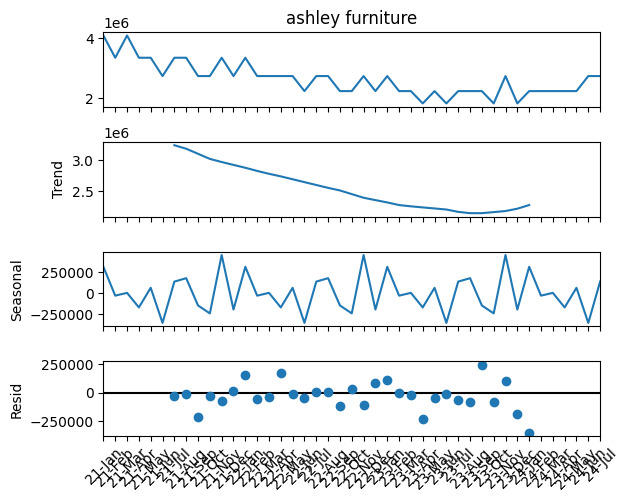

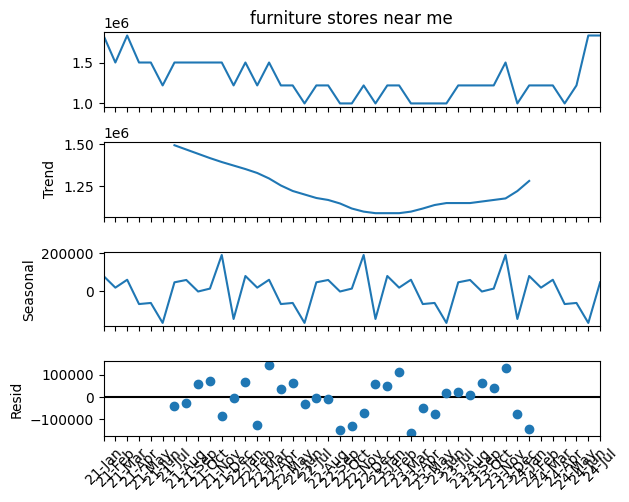

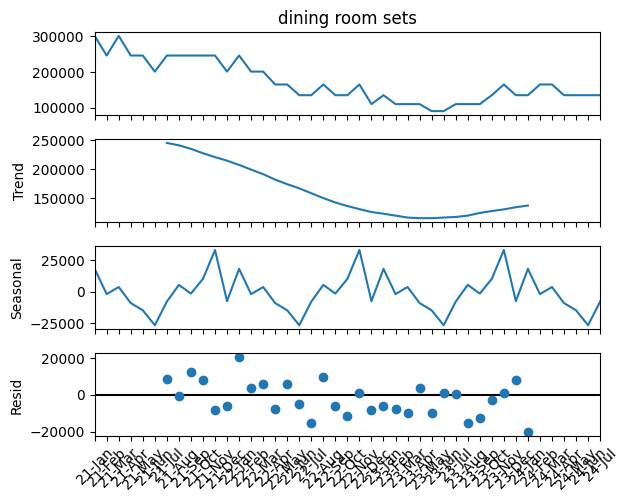

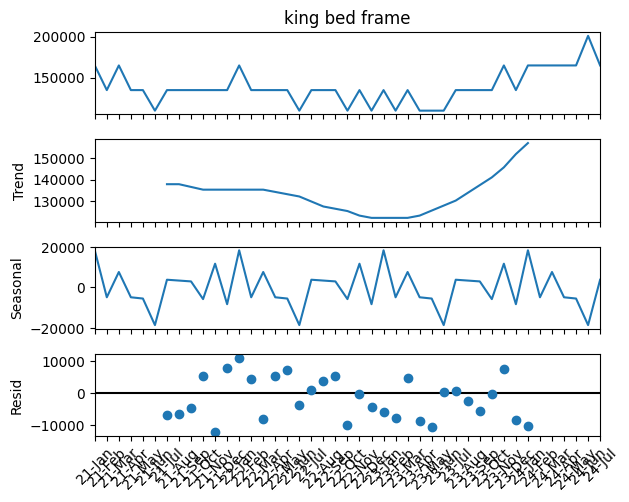

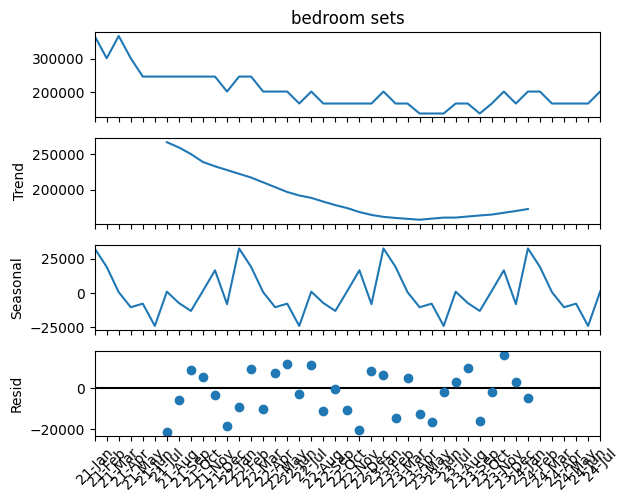

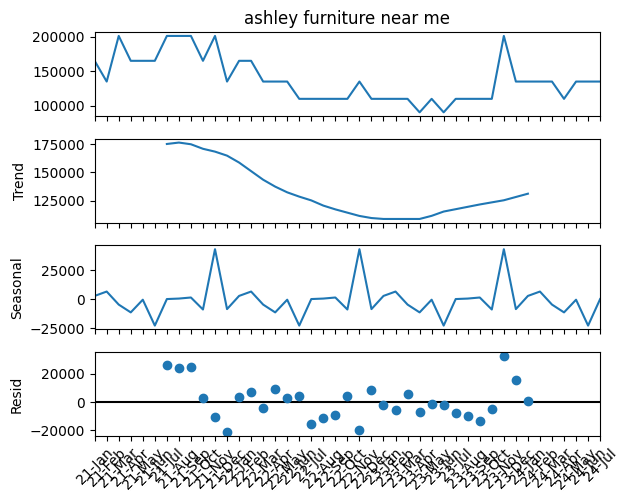

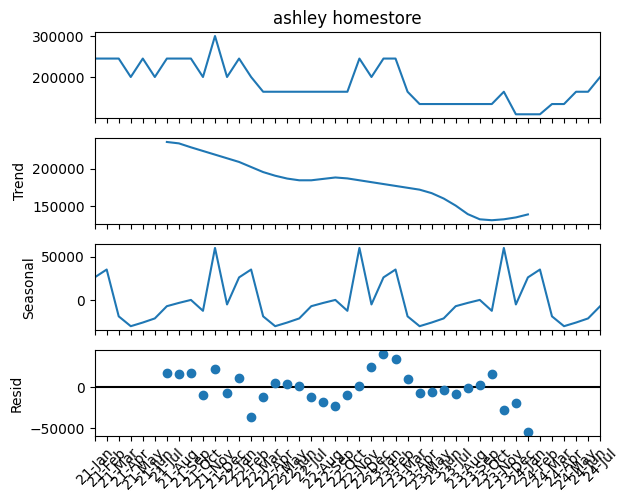

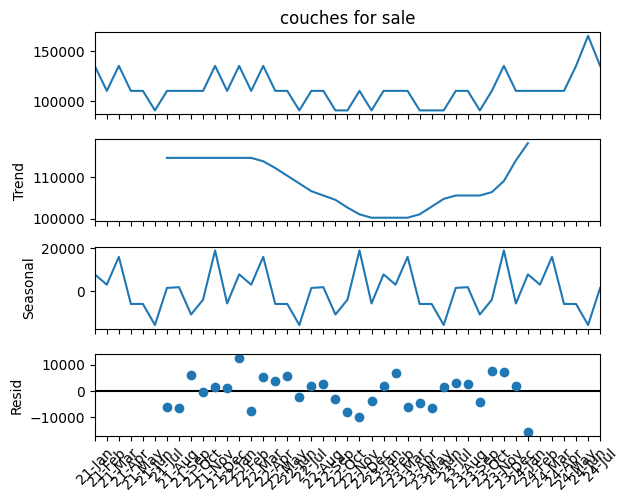

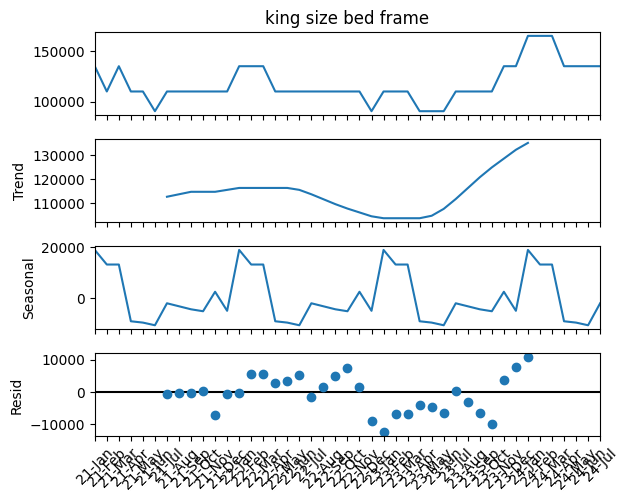

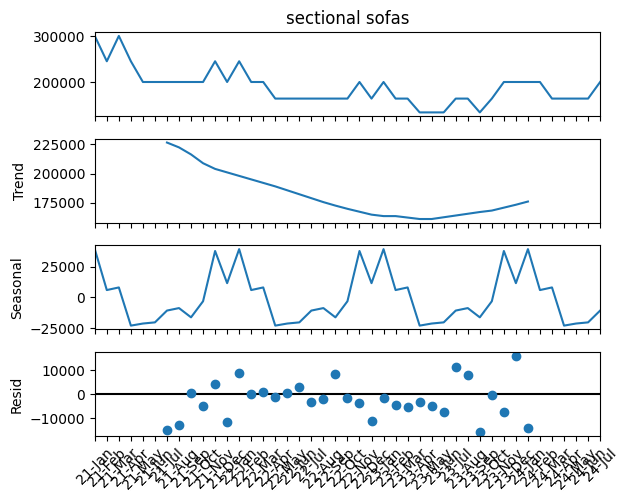

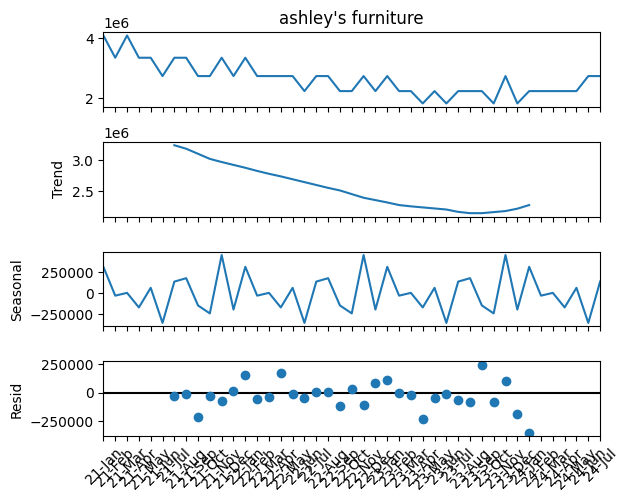

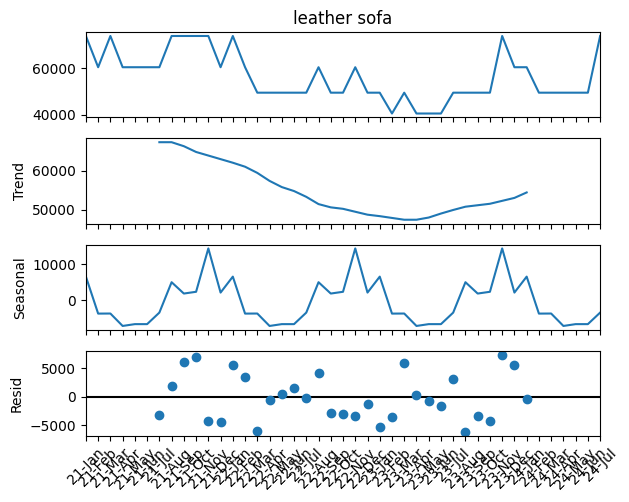

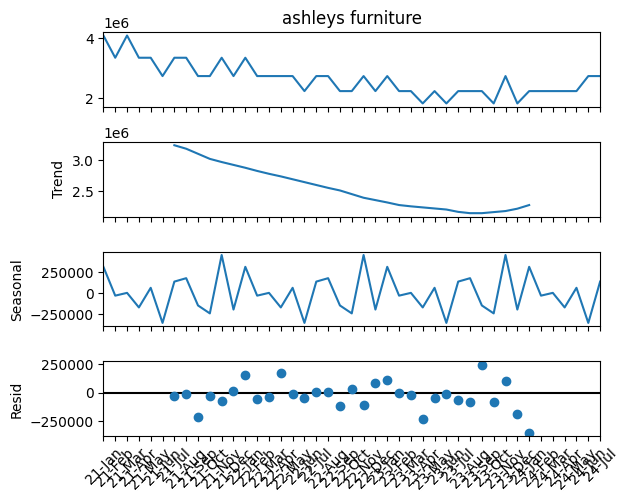

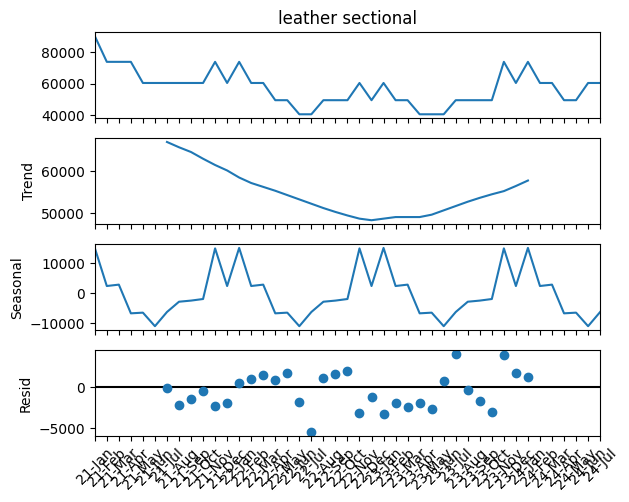

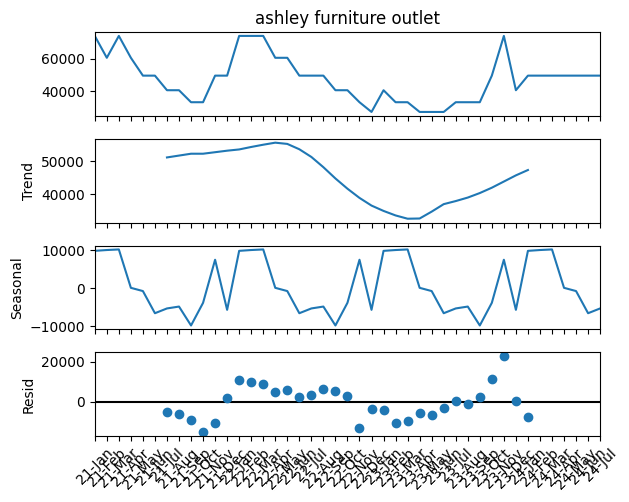

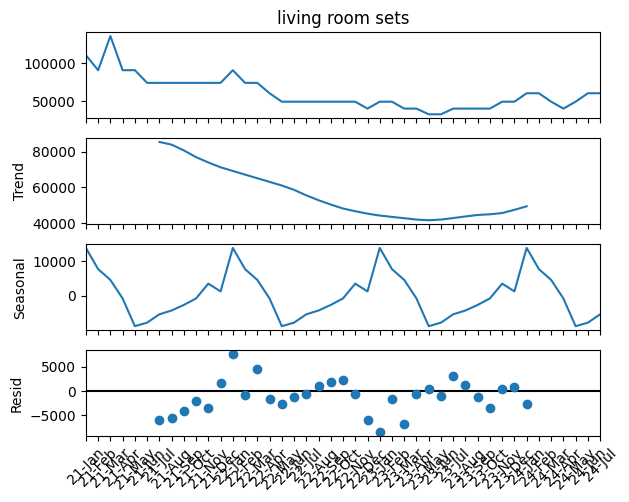

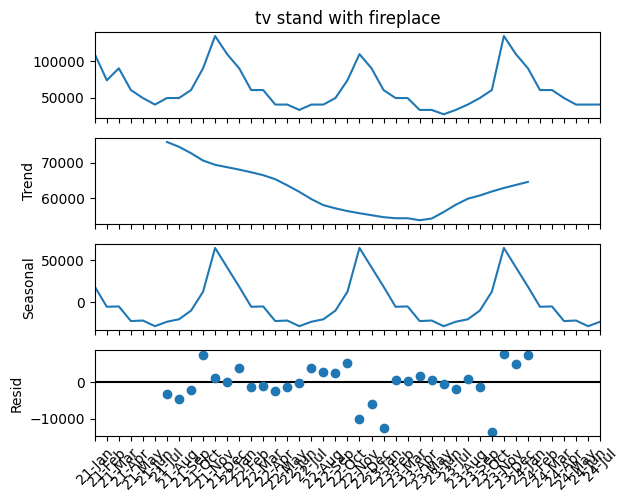

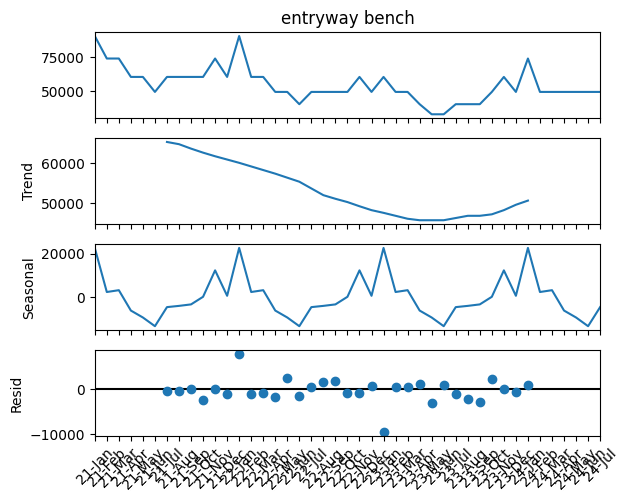

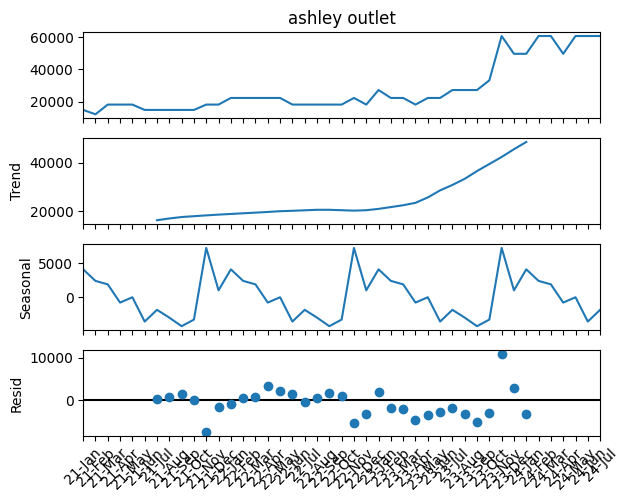

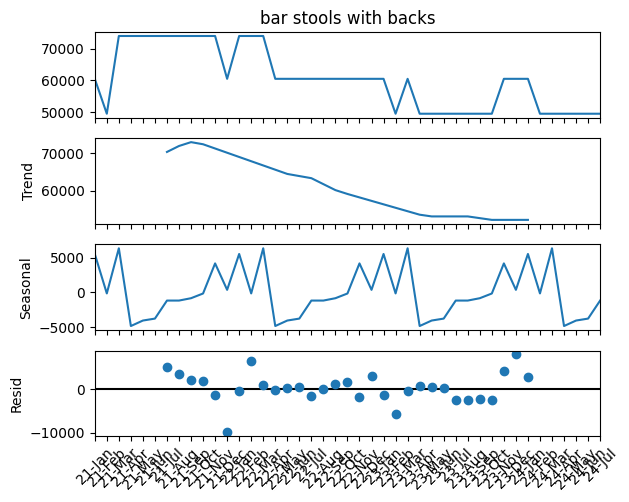

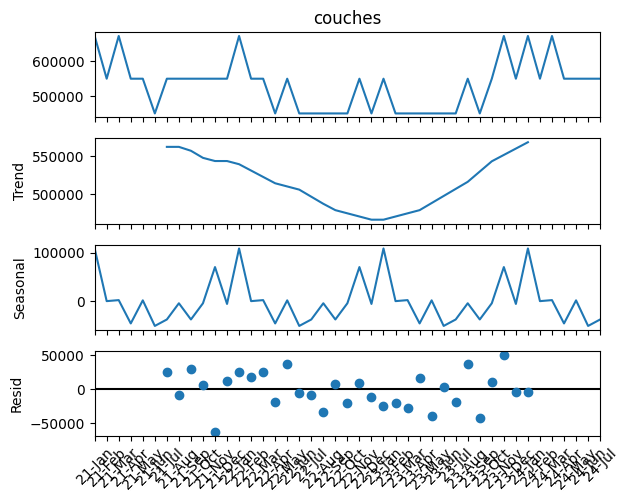

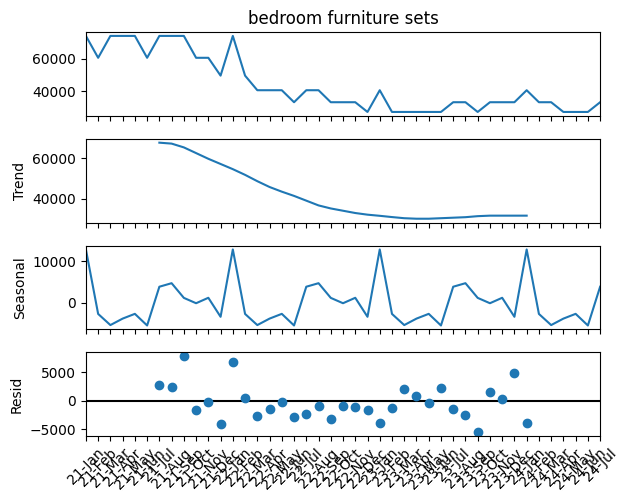

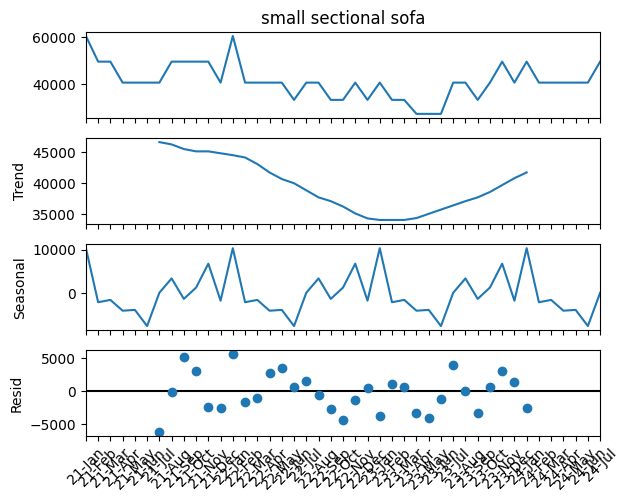

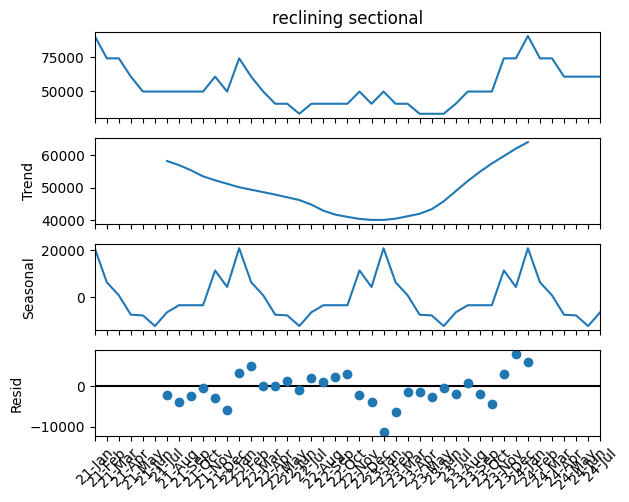

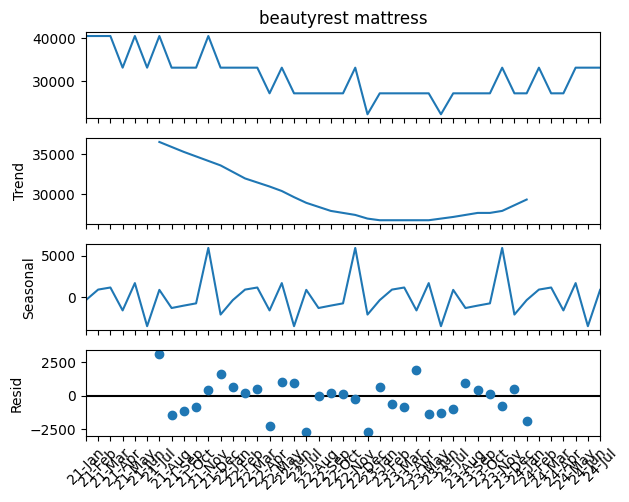

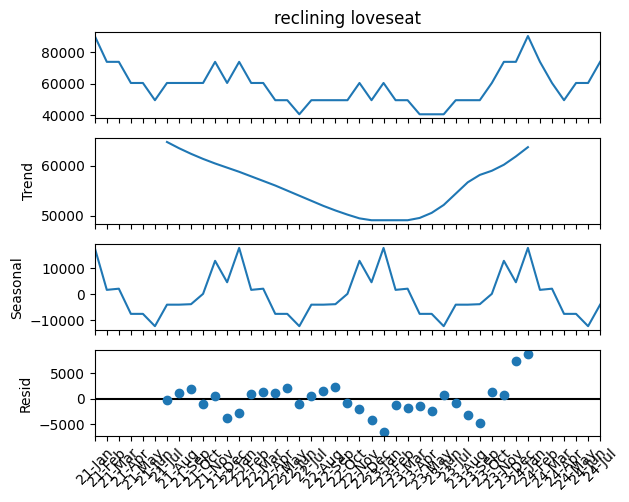

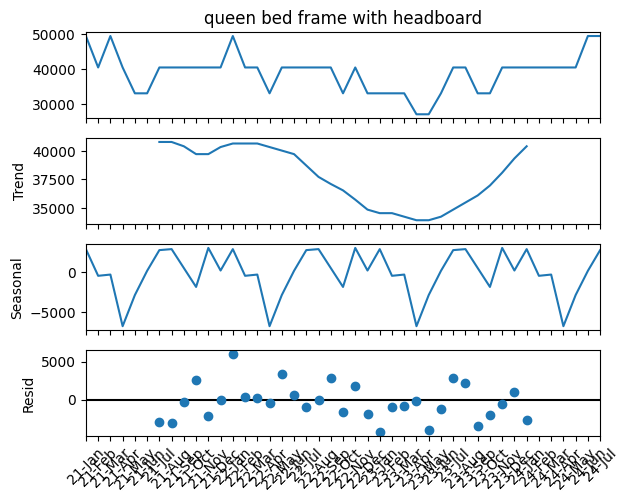

In [ ]:
for x in df_volume.columns:
  decomposition = seasonal_decompose(df_volume[x], model='additive', period=12)
  decomposition.plot()
  plt.xticks(rotation=45)
  plt.show()



In [ ]:
count = 0
for x in df_volume.columns:
  result = adfuller(df_volume[x])

  if result[1] <= 0.05:
    count += 1

  print(f"ADF Statistic: {result[0]}")
  print(f"p-value: {result[1]}")

print(count)

ADF Statistic: -2.2548754561848843
p-value: 0.1869345884387254
ADF Statistic: -3.4604201303585356
p-value: 0.009063710920553759
ADF Statistic: -1.6582989466961093
p-value: 0.45271595404747295
ADF Statistic: -0.8271663273664942
p-value: 0.8110116446768814
ADF Statistic: -2.842074370780112
p-value: 0.05251052753282415
ADF Statistic: -1.6496356096386389
p-value: 0.4572304720922238
ADF Statistic: -1.8836233195887098
p-value: 0.3398040001449427
ADF Statistic: -4.362049525196172
p-value: 0.0003462602169390995
ADF Statistic: -1.807769854200628
p-value: 0.37661105698185876
ADF Statistic: -3.6940465253049326
p-value: 0.004197678677312704
ADF Statistic: -2.2548754561848843
p-value: 0.1869345884387254
ADF Statistic: -3.18758344536171
p-value: 0.020714741962700088
ADF Statistic: -2.2548754561848843
p-value: 0.1869345884387254
ADF Statistic: -2.580120220628629
p-value: 0.09717601548090399
ADF Statistic: -2.9291109345769915
p-value: 0.042066011054656086
ADF Statistic: -2.110217648758391
p-value: 0.2